In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 

from scipy import stats
import joblib

In [2]:
data = pd.read_csv('shuffled.csv')
data.head()

,T1,H1,S1,G1,F1,T2,H2,S2,G2,F2,...,H3,S3,G3,F3,T4,H4,S4,G4,F4,CLASS_LABEL
0,38.02,60.33,0.0,0.0,0.0,49.03,30.50,0.0,0.0,3995.0,...,57.02,0.0,13.0,0.0,40.44,48.29,0.0,13.0,0.0,1.0
1,40.49,50.46,0.0,0.0,1168.0,41.46,41.85,0.0,0.0,0.0,...,44.97,0.0,6.0,0.0,44.48,36.26,0.0,9.0,0.0,1.0
2,30.51,68.20,0.0,8.0,0.0,30.07,69.03,0.0,0.0,0.0,...,66.38,0.0,55.0,0.0,33.13,64.81,0.0,0.0,0.0,0.0
3,48.50,27.77,0.0,16.0,0.0,35.87,52.28,0.0,0.0,0.0,...,35.41,0.0,3.0,1389.0,34.22,100.00,0.0,25.0,0.0,1.0
4,34.35,56.63,0.0,16.0,0.0,33.61,59.26,0.0,0.0,0.0,...,53.87,0.0,0.0,2568.0,53.28,25.62,0.0,33.0,904.0,1.0


C:\Users\taimoor\AppData\Local\Temp\ipykernel_23332\454114196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  data_untransformed = sns.distplot(data['CLASS_LABEL'])


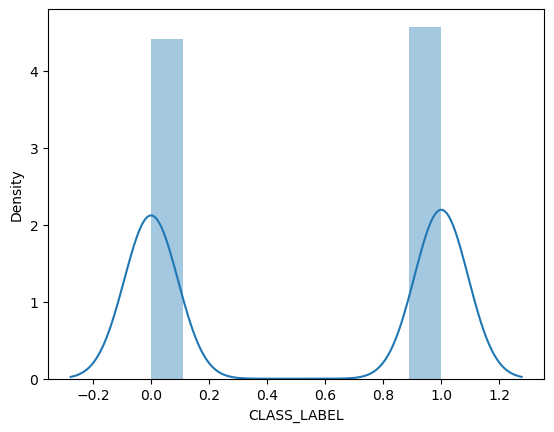

In [3]:
data_untransformed = sns.distplot(data['CLASS_LABEL'])

In [5]:
class_label = data.select_dtypes(include = ['float64','int64'])

from scipy import stats
# df = data.drop('DATE and Time', axis = 1)
z_scores = stats.zscore(class_label)

Q1 = class_label.quantile(0.25)
Q3 = class_label.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = class_label[(class_label < lower_bound) | (class_label > upper_bound)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T1           90 non-null     float64
 1   H1           152 non-null    float64
 2   S1           0 non-null      float64
 3   G1           1 non-null      float64
 4   F1           443 non-null    float64
 5   T2           213 non-null    float64
 6   H2           51 non-null     float64
 7   S2           0 non-null      float64
 8   G2           139 non-null    float64
 9   F2           258 non-null    float64
 10  T3           318 non-null    float64
 11  H3           356 non-null    float64
 12  S3           0 non-null      float64
 13  G3           8 non-null      float64
 14  F3           915 non-null    float64
 15  T4           268 non-null    float64
 16  H4           561 non-null    float64
 17  S4           0 non-null      float64
 18  G4           379 non-null    float64
 19  F4    

<Axes: >

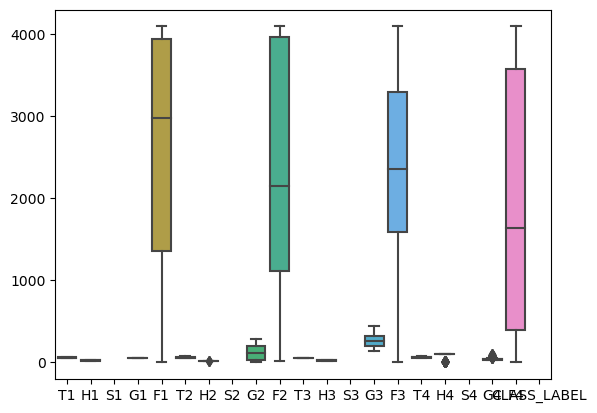

In [6]:
sns.boxplot(outliers)

In [7]:
import pandas as pd

# Assuming class_label contains your data
# class_label = ...  # Your data goes here

# Define a mapping of column names to new names
column_mapping = {
    'T1': 'Temperature1', 'L1': 'Light1', 'G1': 'Gas1', 'S1': 'Smoke1', 'H1': 'Humidity1', 'F1': 'Flame1',
    'T2': 'Temperature2', 'L2': 'Light2', 'G2': 'Gas2', 'S2': 'Smoke2', 'H2': 'Humidity2', 'F2': 'Flame2',
    'T3': 'Temperature3', 'L3': 'Light3', 'G3': 'Gas3', 'S3': 'Smoke3', 'H3': 'Humidity3', 'F3': 'Flame3',
    'T4': 'Temperature4', 'L4': 'Light4', 'G4': 'Gas4', 'S4': 'Smoke4', 'H4': 'Humidity4', 'F4': 'Flame4'
}

# Rename the columns in the DataFrame
class_label = class_label.rename(columns=column_mapping)

# Print the DataFrame with renamed columns
print(class_label)


      Temperature1  Humidity1  Smoke1  Gas1  Flame1  Temperature2  Humidity2  \
0            38.02      60.33     0.0   0.0     0.0         49.03      30.50   
1            40.49      50.46     0.0   0.0  1168.0         41.46      41.85   
2            30.51      68.20     0.0   8.0     0.0         30.07      69.03   
3            48.50      27.77     0.0  16.0     0.0         35.87      52.28   
4            34.35      56.63     0.0  16.0     0.0         33.61      59.26   
...            ...        ...     ...   ...     ...           ...        ...   
4659         35.65      61.33     0.0   6.0     0.0         42.63      42.22   
4660         30.48      68.24     0.0   8.0     0.0         30.02      68.82   
4661         28.86      71.87     0.0   0.0     0.0         29.05      68.43   
4662         61.90      17.03     0.0  16.0     0.0         36.39      51.16   
4663         41.72      47.51     0.0   0.0     0.0         39.80      46.65   

      Smoke2  Gas2  Flame2  ...  Humidi

<Axes: >

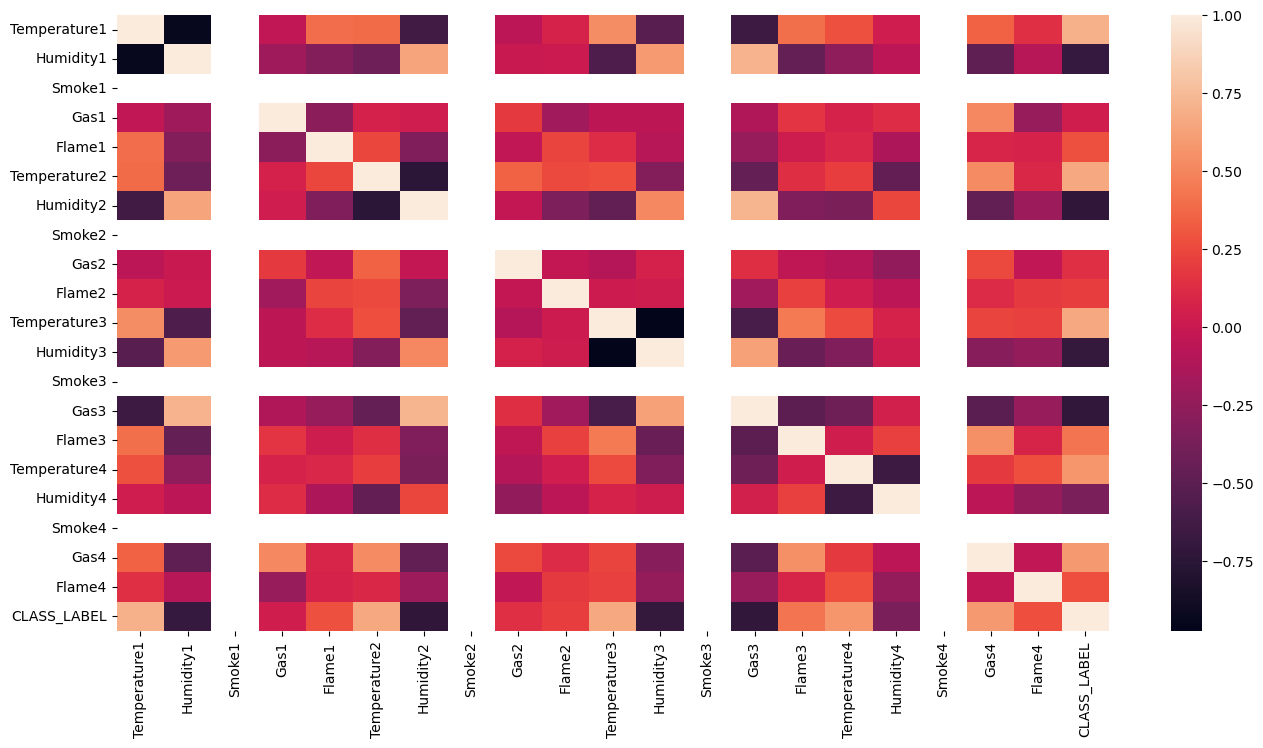

In [8]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(class_label.corr())

In [9]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
ax.pie(feature_imp, labels=None, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5.5 else '')
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Move the legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=feature_imp.index)

plt.show()

NameError: name 'model' is not defined